In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns 
import pickle

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data['BMI'] = data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure'] = data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose'] = data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness'] = data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


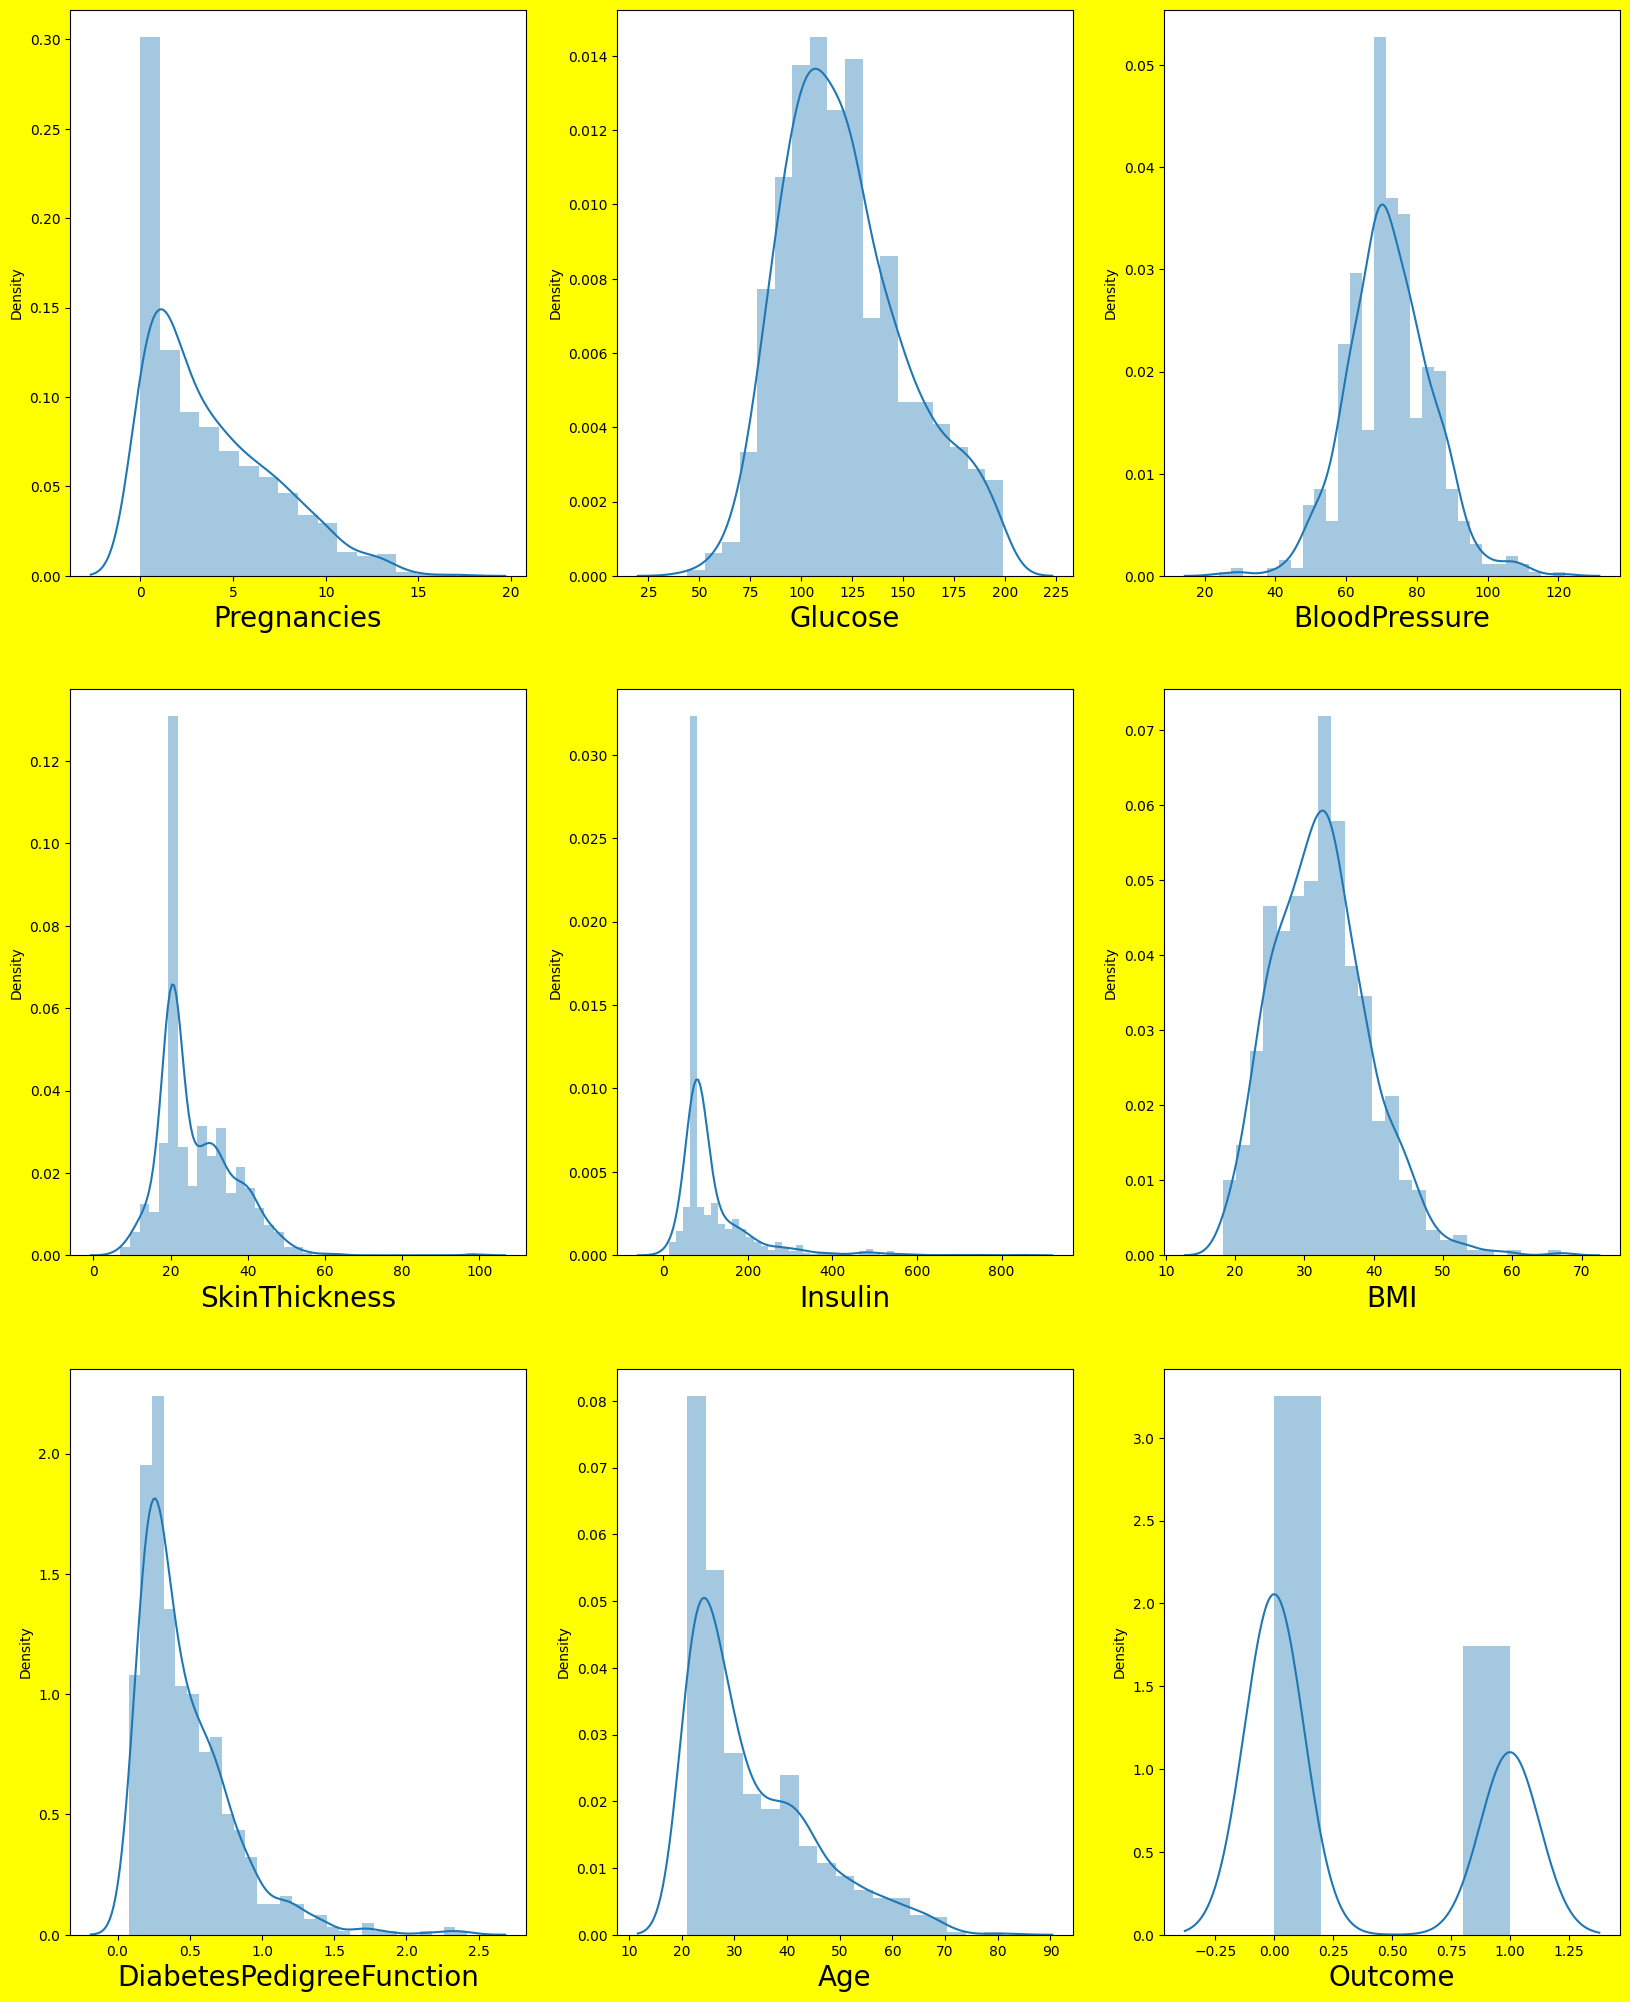

In [7]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [8]:
df_features = data.drop('Outcome',axis = 1)

In [9]:
df_features

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47


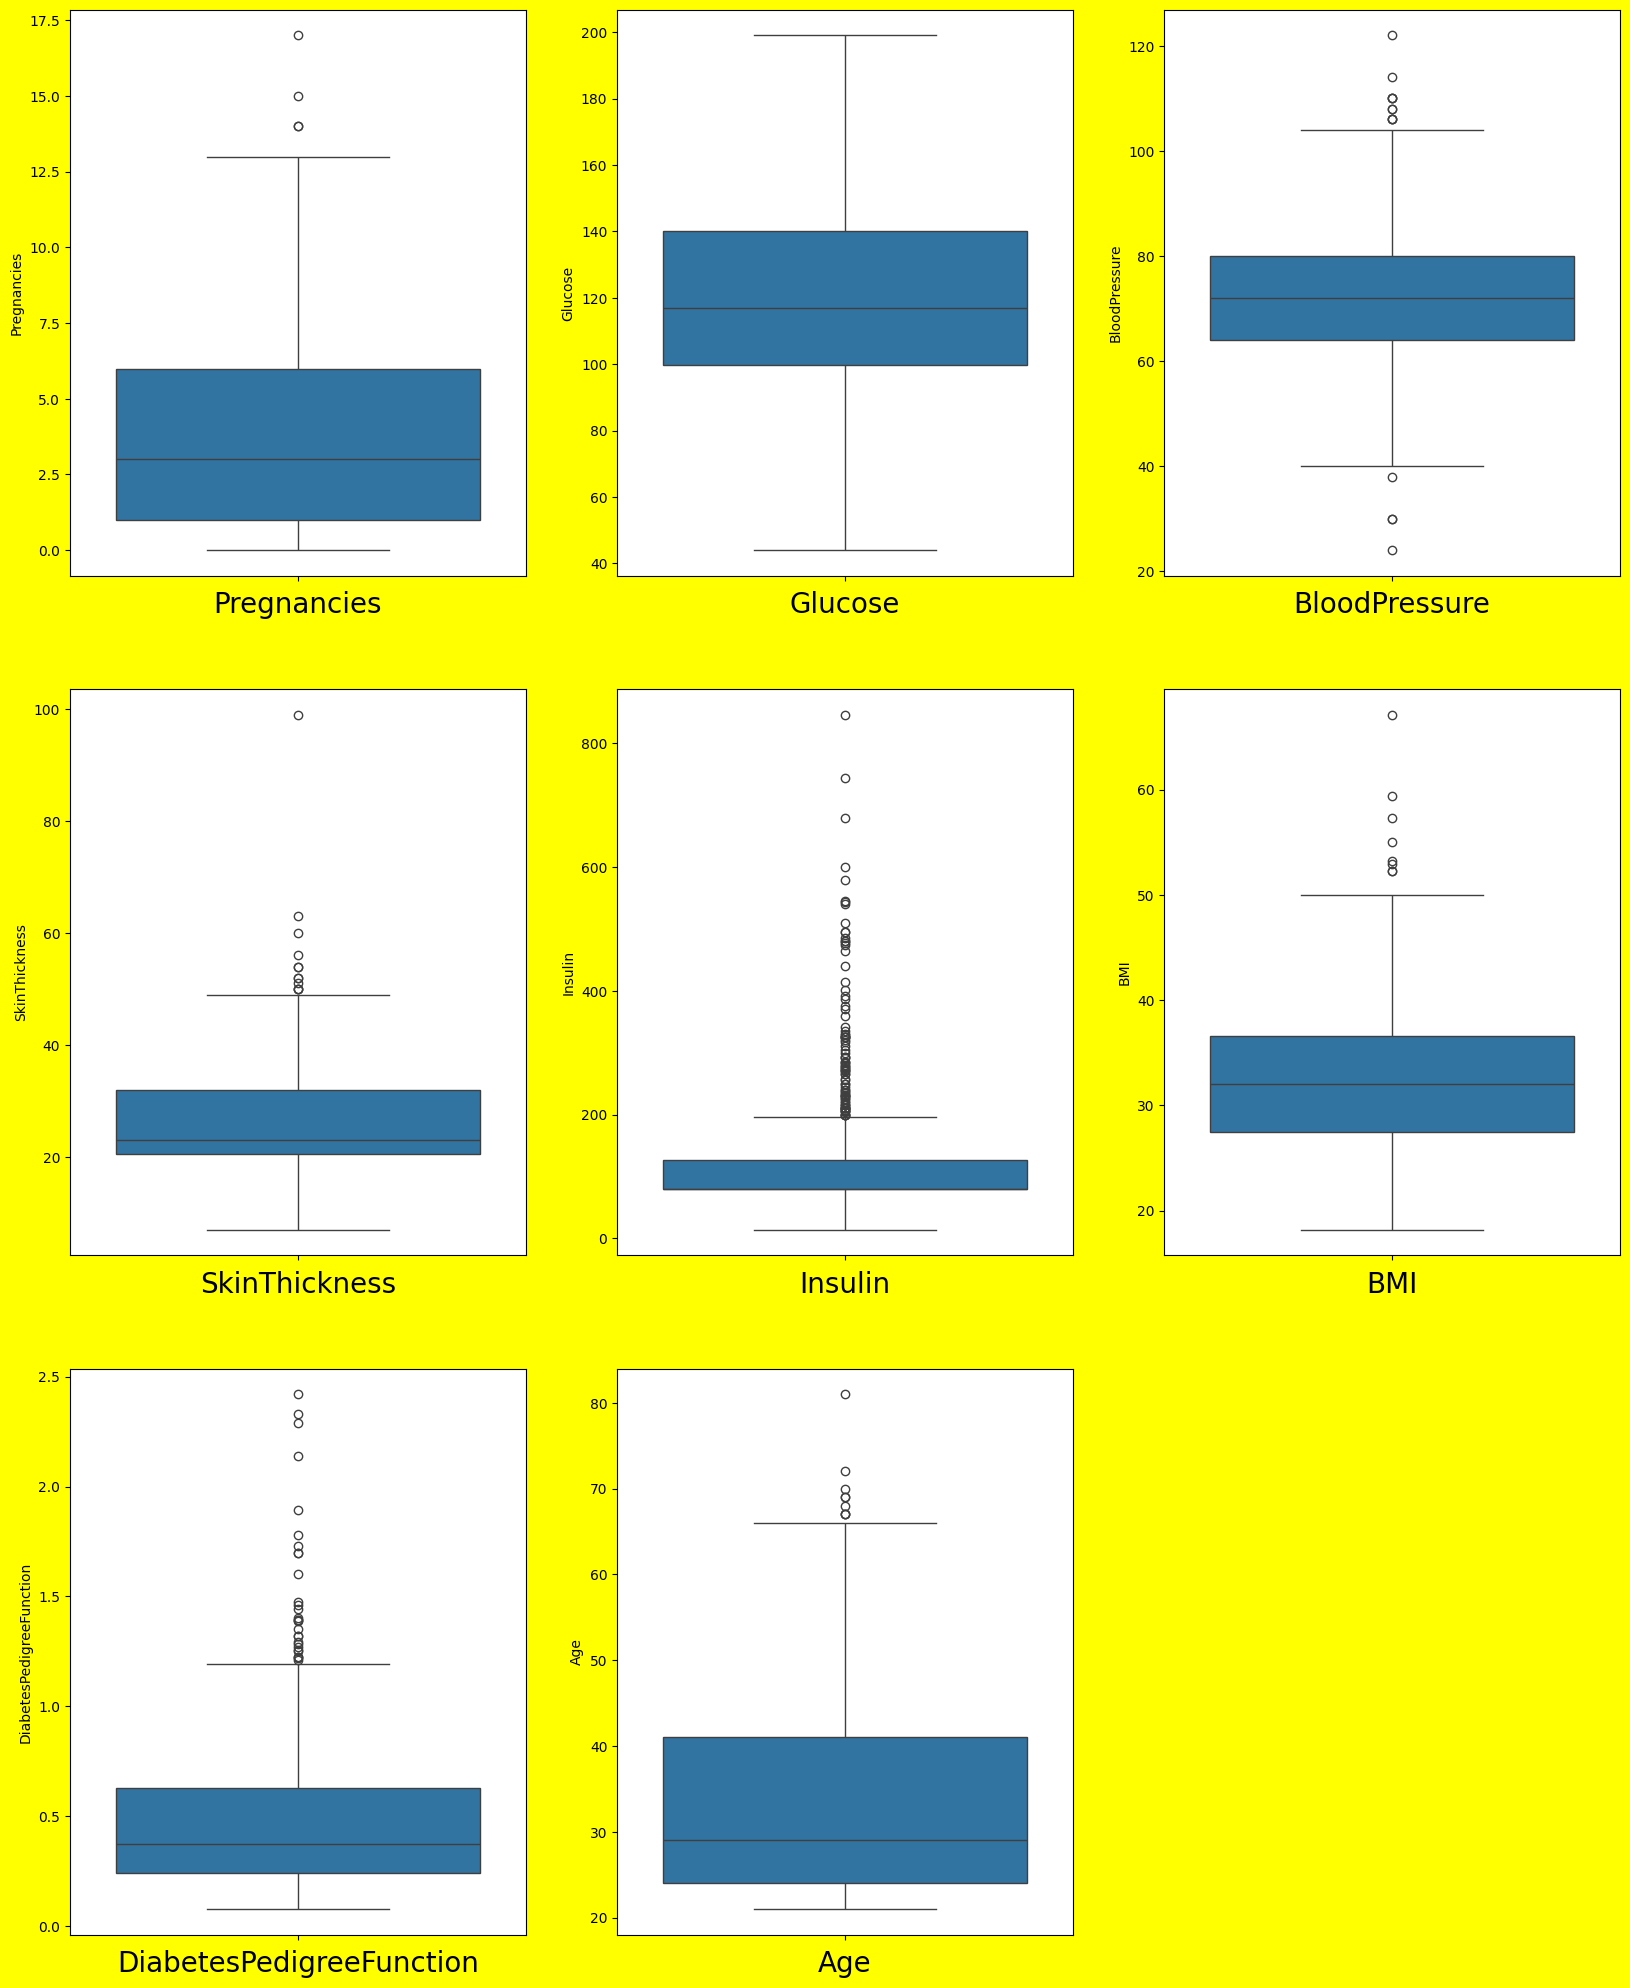

In [10]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in df_features:
    if plotnumber <= 9:
        plt.subplot(3,3,plotnumber)
        ax = sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [11]:
data.shape

(768, 9)

In [12]:
#FIND IQR
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)

iqr  = q3 - q1

## OUTLIRES DETECTION FORMULA

In [13]:
preg_high = (q3.Pregnancies + (1.5 * iqr.Pregnancies))
preg_high

13.5

In [14]:
np_index = np.where(data['Pregnancies'] > preg_high)
np_index

(array([ 88, 159, 298, 455], dtype=int64),)

In [15]:
data = data.drop(data.index[np_index])
data.shape

(764, 9)

In [16]:
data.reset_index()

,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
759,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
760,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
761,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
762,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [17]:
bp_high = (q3.BloodPressure + (1.5 * iqr.BloodPressure))
print(bp_high)

index = np.where(data['BloodPressure'] > bp_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

104.0
(754, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
749,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
750,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
751,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
752,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [18]:
index

(array([ 43,  84, 105, 175, 359, 545, 654, 658, 668, 687], dtype=int64),)

In [19]:
st_high = (q3.SkinThickness + (1.5 * iqr.SkinThickness))
print(st_high)

index = np.where(data['SkinThickness'] > st_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

49.1953125
(742, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
737,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
738,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
739,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
740,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [20]:
insu_high = (q3.Insulin + (1.5 * iqr.Insulin))
print(insu_high)

index = np.where(data['Insulin'] > insu_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

198.42578125
(657, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
652,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
653,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
654,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
655,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [21]:
bmi_high = (q3.BMI + (1.5 * iqr.BMI))
print(bmi_high)

index = np.where(data['BMI'] > bmi_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

50.25
(654, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...,...
649,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
650,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
651,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
652,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [22]:
dpf_high = (q3.DiabetesPedigreeFunction + (1.5 * iqr.DiabetesPedigreeFunction))
print(dpf_high)

index = np.where(data['DiabetesPedigreeFunction'] > dpf_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

1.2
(631, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
626,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
627,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
628,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
629,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [23]:
age_high = (q3.Age + (1.5 * iqr.Age))
print(age_high)

index = np.where(data['Age'] > age_high)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

66.5
(622, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
617,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
618,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
619,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
620,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


In [24]:
bp_low = (q1.BloodPressure - (1.5 * iqr.BloodPressure))
print(bp_low)

index = np.where(data['BloodPressure'] < bp_low)

data = data.drop(data.index[index])
print(data.shape)

data.reset_index()

40.0
(619, 9)


,index,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...,...
614,763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
615,764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
616,765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
617,766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


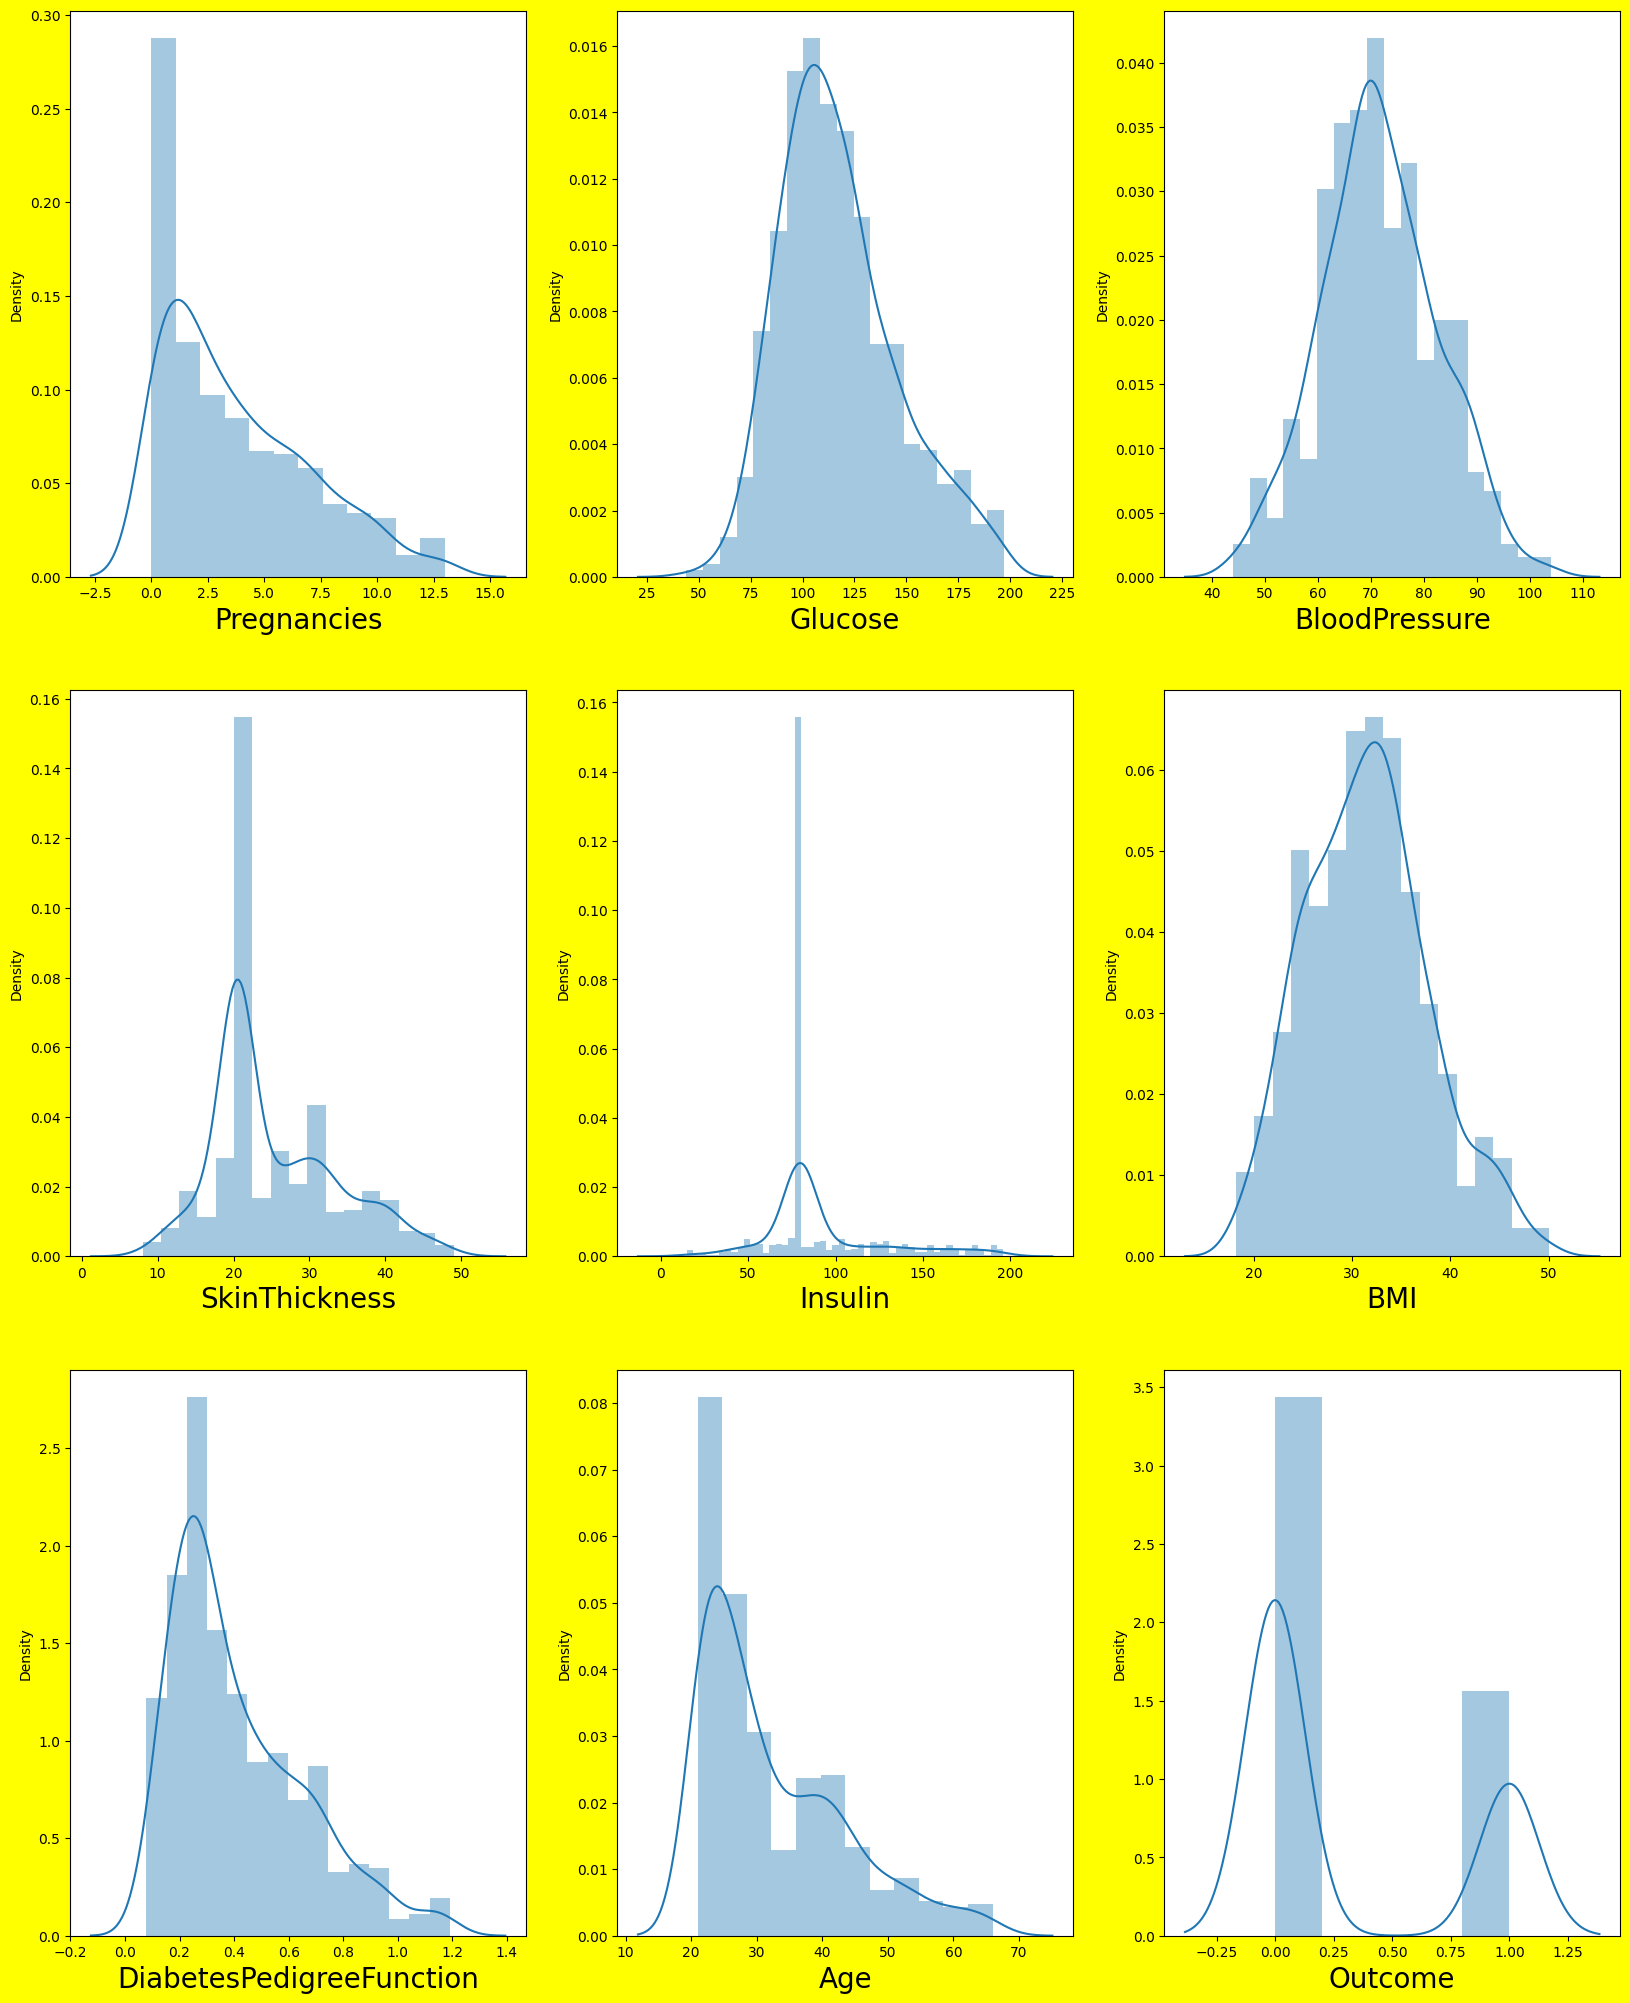

In [25]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in data:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [26]:
X = data.drop(columns = ['Outcome'])
y = data['Outcome']

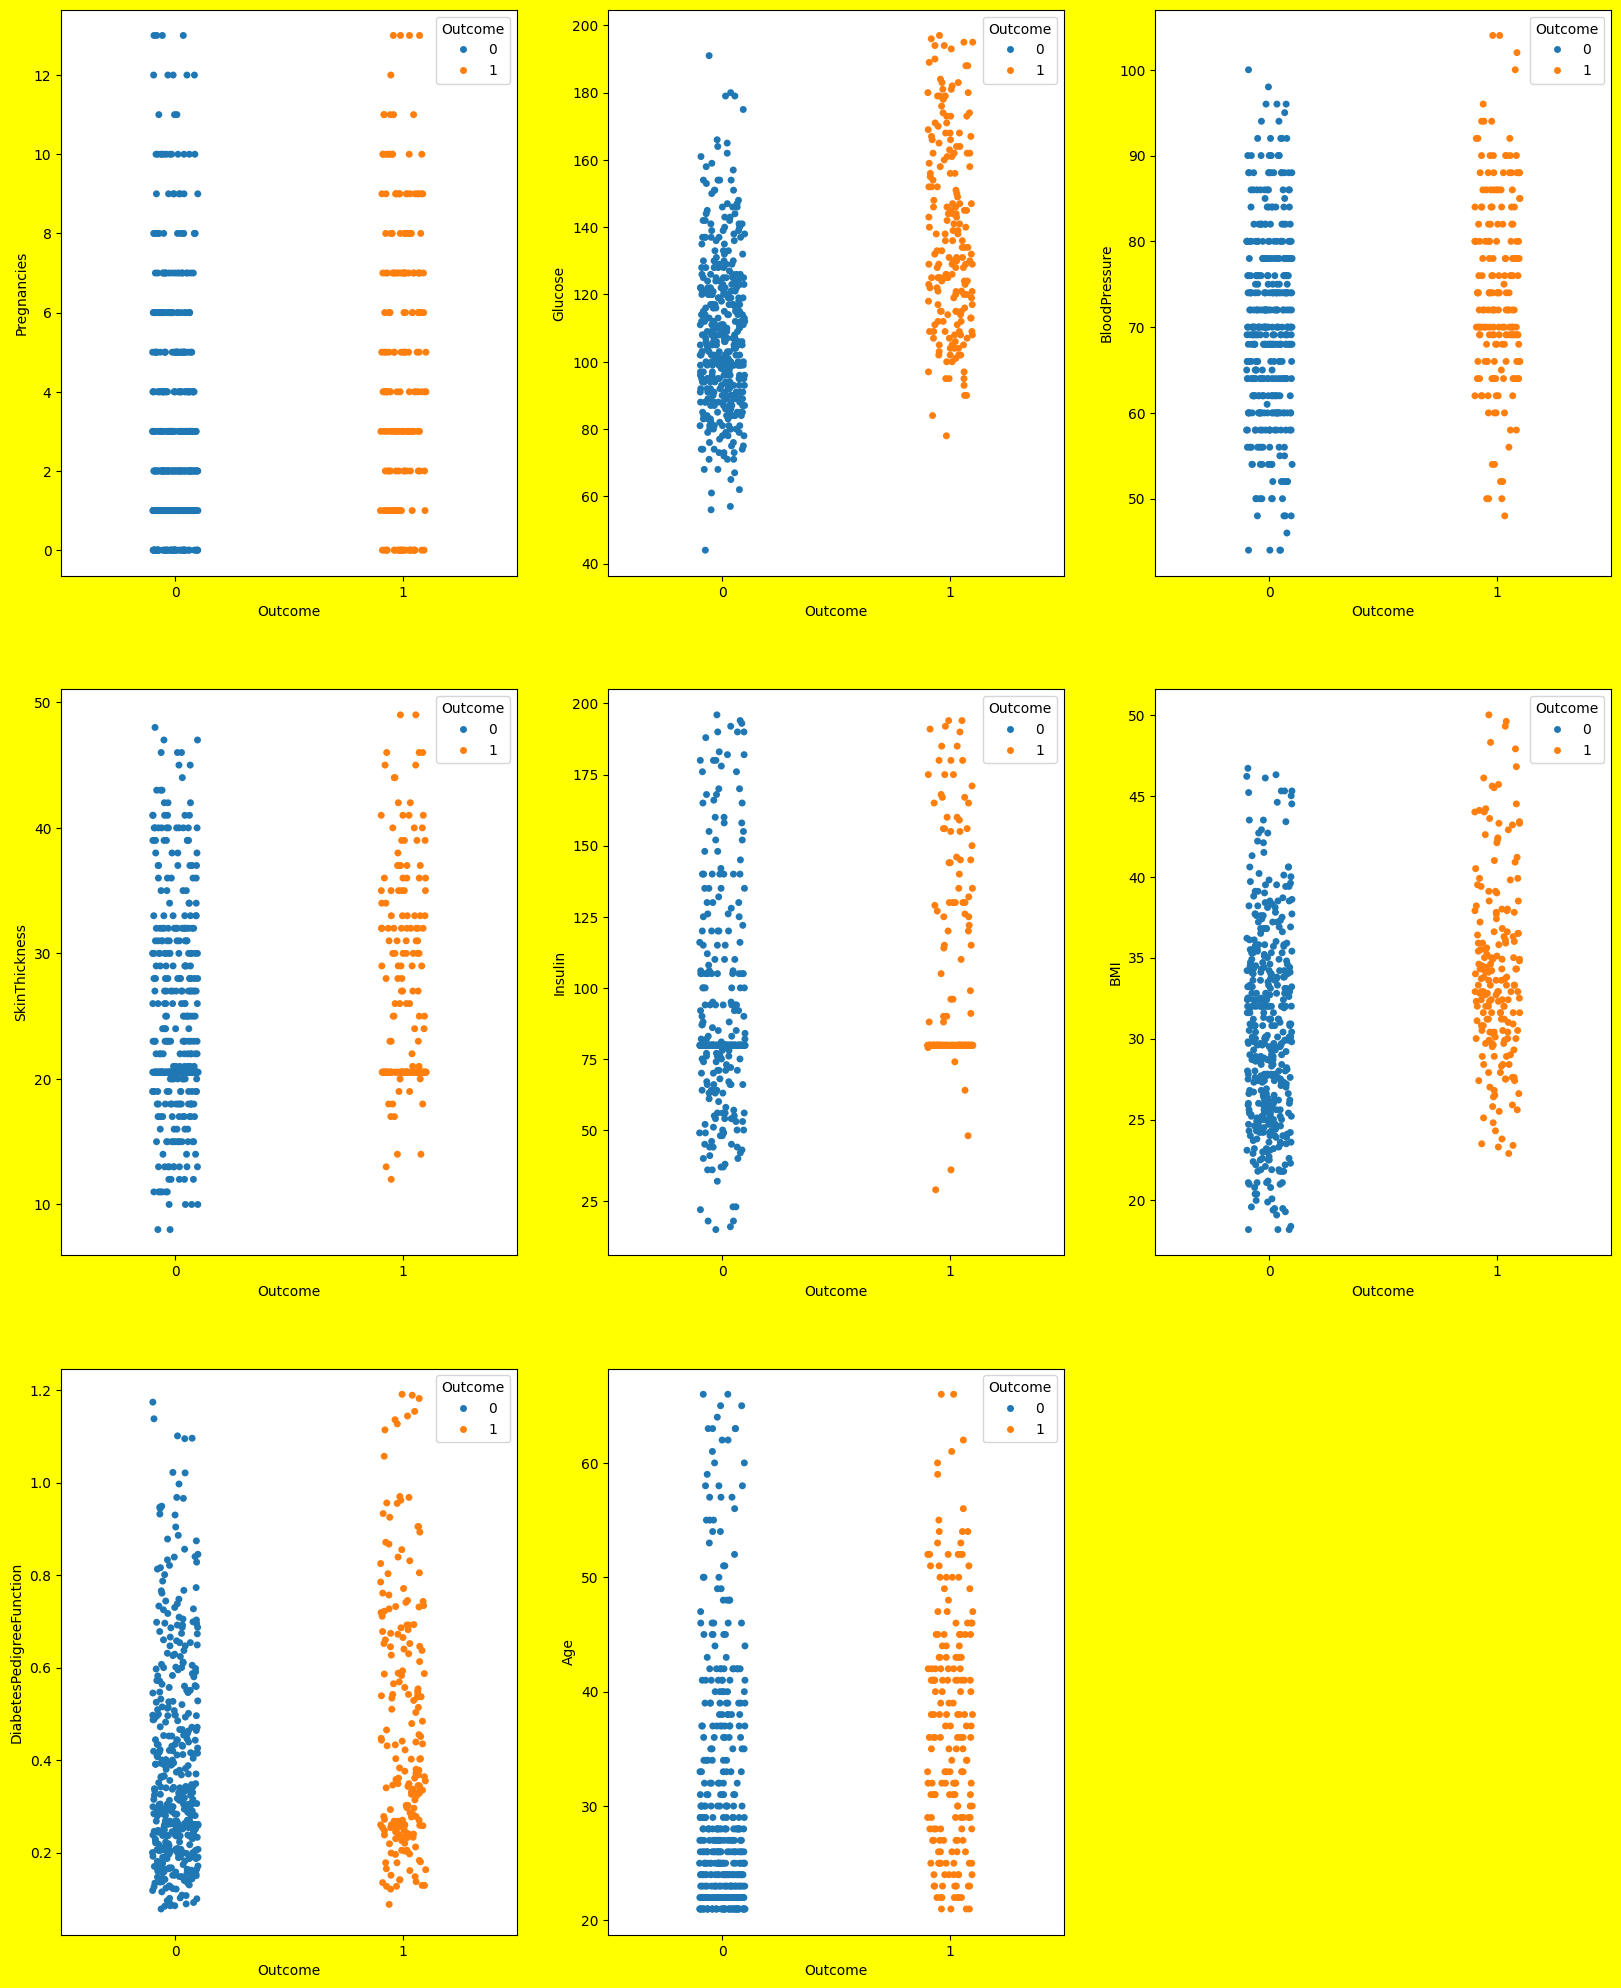

In [27]:
plt.figure(figsize=(20,25),facecolor='yellow')
plotnumber = 1
for column in X:
    if plotnumber <= 9:
        ax = plt.subplot(3,3,plotnumber)
        sns.stripplot(x=y,y=X[column],hue = y)
        #plt.xlabel(column,fontsize=20)
    plotnumber += 1
plt.show()

In [28]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [30]:
X_scaled.shape[1]

8

In [37]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns


In [38]:
vif

,vif,features
0,1.450015,Pregnancies
1,1.252597,Glucose
2,1.247043,BloodPressure
3,1.417950,SkinThickness
4,1.197397,Insulin
5,1.446357,BMI
6,1.036922,DiabetesPedigreeFunction
7,1.651413,Age


In [39]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state = 355)

## MODEL BUILDING

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred = log_reg.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0], dtype=int64)

In [43]:
log_reg.predict_proba(x_test)

array([[0.53297675, 0.46702325],
       [0.78369678, 0.21630322],
       [0.87521337, 0.12478663],
       [0.50474808, 0.49525192],
       [0.03166885, 0.96833115],
       [0.69666672, 0.30333328],
       [0.86986775, 0.13013225],
       [0.99131184, 0.00868816],
       [0.95223867, 0.04776133],
       [0.8923239 , 0.1076761 ],
       [0.25528091, 0.74471909],
       [0.01319308, 0.98680692],
       [0.41481205, 0.58518795],
       [0.35767901, 0.64232099],
       [0.92835858, 0.07164142],
       [0.87492444, 0.12507556],
       [0.6504698 , 0.3495302 ],
       [0.96224025, 0.03775975],
       [0.88699512, 0.11300488],
       [0.22645775, 0.77354225],
       [0.93552198, 0.06447802],
       [0.97351476, 0.02648524],
       [0.54633353, 0.45366647],
       [0.88245115, 0.11754885],
       [0.82439297, 0.17560703],
       [0.74623837, 0.25376163],
       [0.8537012 , 0.1462988 ],
       [0.51629479, 0.48370521],
       [0.81743867, 0.18256133],
       [0.45273371, 0.54726629],
       [0.

In [44]:
#model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8012820512820513

In [45]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[101,  13],
       [ 18,  24]], dtype=int64)

In [46]:
(101+24)/(101+13+18+24)

0.8012820512820513

## f1/recall/precission

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       114
           1       0.65      0.57      0.61        42

    accuracy                           0.80       156
   macro avg       0.75      0.73      0.74       156
weighted avg       0.79      0.80      0.80       156



In [50]:
fpr,tpr,thresholds  = roc_curve(y_test,y_pred)

In [54]:
fpr,tpr,thresholds

(array([0.        , 0.11403509, 1.        ]),
 array([0.        , 0.57142857, 1.        ]),
 array([inf,  1.,  0.]))

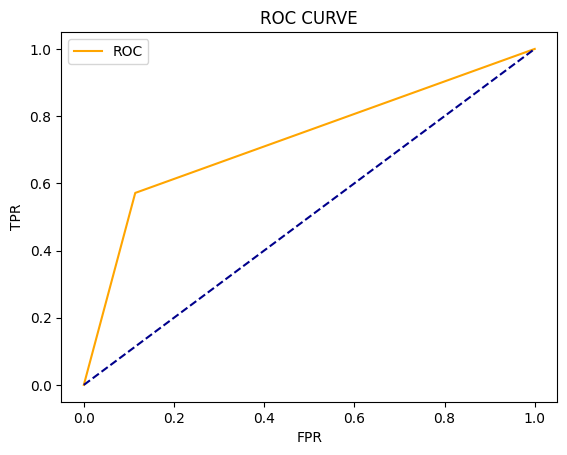

In [57]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC CURVE')
plt.legend()
plt.show()

In [58]:
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.7286967418546366


#NOTES:- 
The AUC (Area Under the ROC Curve) score is a common metric used to evaluate the performance of binary classification models. It measures the ability of the model to distinguish between the positive and negative classes. 

In general, the AUC score ranges from 0 to 1, where:

- A score of 0.5 indicates that the model performs no better than random guessing.
- A score of 1 indicates perfect performance, meaning the model perfectly distinguishes between the two classes.

Interpreting AUC scores:

- AUC > 0.9: Excellent model
- 0.9 > AUC > 0.8: Very good model
- 0.8 > AUC > 0.7: Good model
- 0.7 > AUC > 0.6: Fair model
- 0.6 > AUC > 0.5: Poor model

However, it's important to consider the context of your specific problem and the baseline performance. For example, if the problem is highly imbalanced, a "good" AUC score might be lower than in a balanced dataset. Additionally, AUC should be considered alongside other metrics like accuracy, precision, recall, and F1 score for a comprehensive evaluation of model performance.